#  &#x1F347; Red Wine Quality  &#x1F377;

The dataset is about the physicochemical variables (e.g., acidity, sugar, alcohol content) that affect the quality of Portuguese red wines, \
more description about the dataset can be found on this [link](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377). The goal of this project is to identify which variables influence wine quality the most.

The following table presents the
physicochemical statistics of the dataset.

| Features | Units|
|:---------|:----:|
| Fixed acidity| g(tartaric acid)/dm<sup>3</sup>|
| Volatile acidity| g(acetic acid)/dm<sup>3</sup>|
| Citric acid| g/dm<sup>3</sup>|
| Residual sugar| g/dm<sup>3</sup>|
| Chlorides| g(sodium chloride)/dm<sup>3</sup>|
| Free sulfur dioxide| mg/dm<sup>3</sup>|
| Total sulfur dioxide| mg/dm<sup>3</sup>|
| Density| g/cm<sup>3</sup>|
| pH| - |
| Sulphates| g(potassium sulphate)/dm<sup>3</sup>|
| Alcohol| vol. %|




Regarding the preferences,
each sample was evaluated by a minimum of three sensory assessors
(using blind tastes), which graded the wine in a scale that ranges from\
0 (very bad) to 10 (excellent). The final sensory score is given by the
median of these evaluations.[1](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377)

In [1813]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import (
    Ridge,
    Lasso,
    ElasticNet,
    RidgeCV,
    LassoCV,
    ElasticNetCV,
)
from sklearn.model_selection import KFold
import warnings

warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = "Times New Roman"

In [1814]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [1815]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1816]:
if wine.isnull().sum().sum() == 0:
    print("No missing data")
else:
    print(f"There are {wine.isnull().sum().sum()} missing data")
    print("Removing duplicated data...")
    wine.dropna(inplace=True)
    print("Done")
print()
if wine.duplicated().sum() == 0:
    print("No duplicated data")
else:
    print(f"There are {wine.duplicated().sum()} duplicated data")
    print("Removing duplicated data...")
    wine.drop_duplicates(inplace=True)
    print("Done")

No missing data

There are 240 duplicated data
Removing duplicated data...
Done


In [1817]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## Exploratory Data Analysis

### Understanding the relationships between variables

What is the distribution of wines according to their quality?

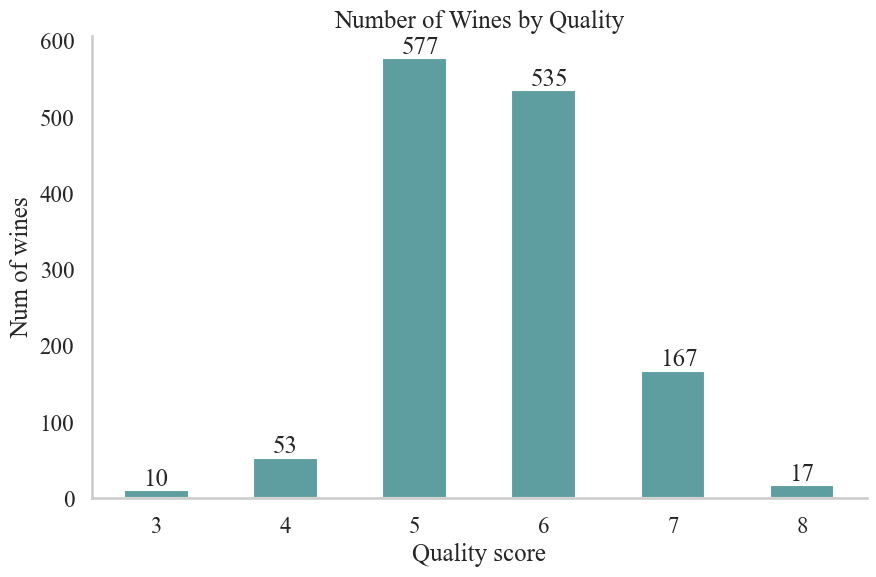

In [1818]:
figure = plt.figure(figsize=(10, 6))
wine["quality"].value_counts().sort_index().plot(kind="bar", color="cadetblue")
plt.xlabel("Quality score")
plt.ylabel("Num of wines")
plt.title("Number of Wines by Quality")
plt.xticks(rotation=0)
for i in range(3, 9):
    plt.text(
        i - 3.1,
        wine["quality"].value_counts().sort_index().values[i - 3] + 6,
        wine["quality"].value_counts().sort_index().values[i - 3],
    )
plt.gca().spines[["top", "right"]].set_visible(False)
plt.grid(False)
plt.show()

The majority of wines tend to have a quality score of around five or six. \
But, how do psychochemical features correlate with quality?

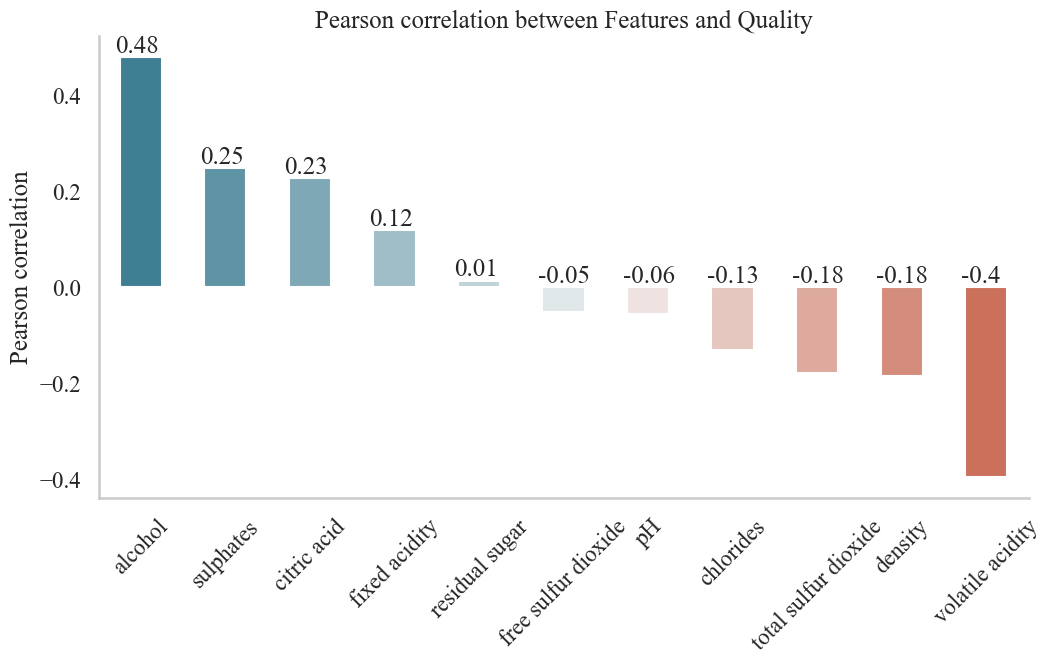

In [1819]:
colors = sns.diverging_palette(220, 20, n=len(wine.columns))
wine.drop("quality", axis=1).corrwith(wine["quality"]).sort_values(
    ascending=False
).plot(kind="bar", color=colors, figsize=(12, 6), rot=45)
plt.title("Pearson correlation between Features and Quality")
plt.grid(False)
plt.gca().spines[["top", "right"]].set_visible(False)
plt.ylabel("Pearson correlation")
for i in range(5):
    plt.text(
        i - 0.3,
        wine.drop("quality", axis=1)
        .corrwith(wine["quality"])
        .sort_values(ascending=False)
        .values[i]
        + 0.01,
        round(
            wine.drop("quality", axis=1)
            .corrwith(wine["quality"])
            .sort_values(ascending=False)
            .values[i],
            2,
        ),
    )
for i in range(5, 11):
    plt.text(
        i - 0.3,
        0.01,
        round(
            wine.drop("quality", axis=1)
            .corrwith(wine["quality"])
            .sort_values(ascending=False)
            .values[i],
            2,
        ),
    )
plt.show()

The results suggest that alcohol content has a strong positive association with wine quality. For every one-unit increase in alcohol content, \
wine quality is predicted to increase by 0.48 units, holding all other variables constant. Volatile acidity, on the other hand, has a strong negative association with wine quality. \
For every one-unit increase in volatile acidity, wine quality is predicted to decrease by 0.4 units, holding all other variables constant.

### Formulate a Hypothesis

- **Null Hypothesis (H₀)**: Alcohol content has no effect on perceived wine quality. 
- **Alternative Hypothesis (H₁)**: Higher alcohol content correlates with better wine quality.

#### Distribution of Physicochemical Properties

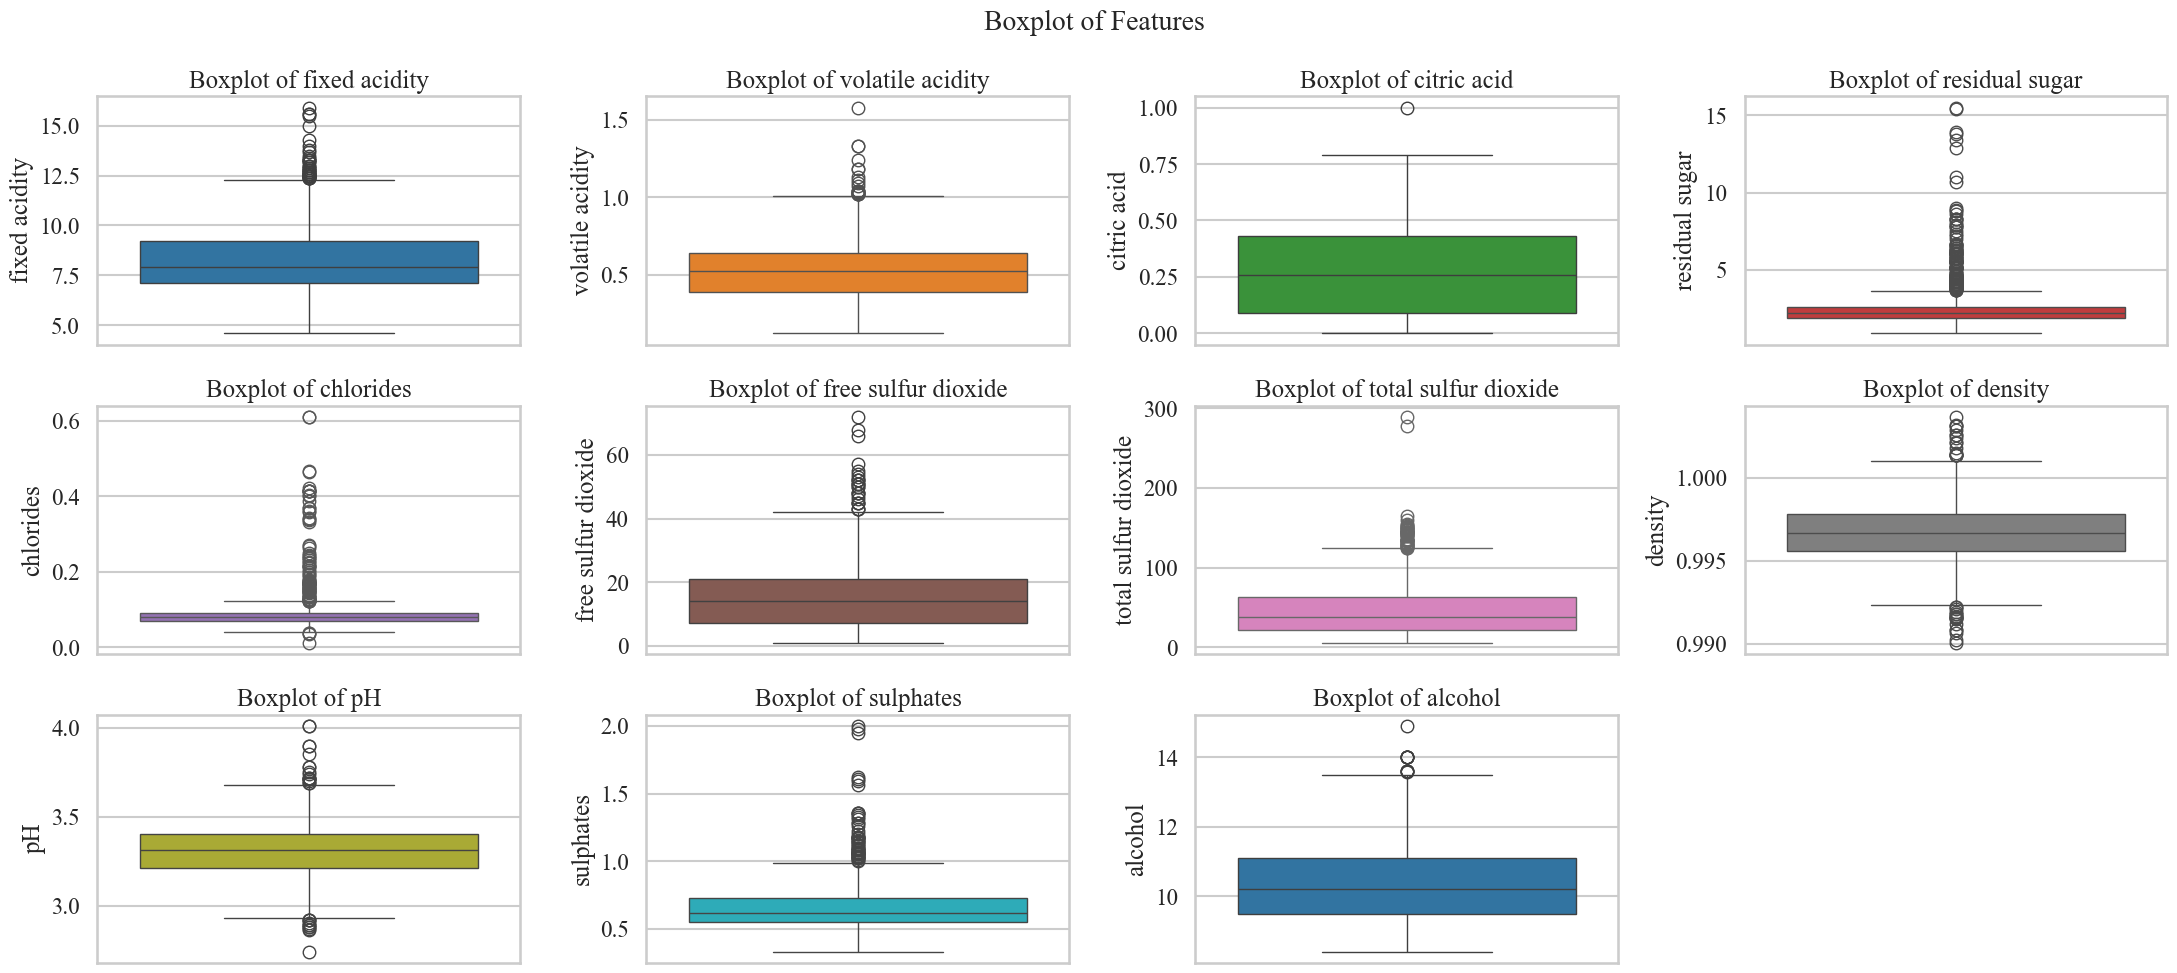

In [1820]:
variables = wine.drop("quality", axis=1)

rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(22, 10))
colors = sns.color_palette("tab10", len(variables.columns))

for ind, column in enumerate(variables):
    row = ind // cols
    col = ind % cols
    sns.boxplot(
        variables[column], orient="v", ax=axes[row, col], color=colors[ind]
    )
    axes[row, col].set_title(f"Boxplot of {column}")

for i in range(ind + 1, rows * cols):
    fig.delaxes(axes.flatten()[i])

fig.suptitle("Boxplot of Features", fontsize=20)
fig.tight_layout()
plt.show()

- **Fixed acids**: The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  Tartaric acid is the key grape acid, and can reach levels of 15 grams a litre in unripe grapes.[1](https://www.sciencedirect.com/science/article/abs/pii/S0308814622023470)

- **Volatile Acids**: Normally, the volatile acids are present in small quantities.There are eight in all, but in wine, when we talk about “volatile acidity,” or VA, we’re essentially talking about acetic acid. In the case of vinegar, it’s present at concentrations of 30 to 90 g/L, versus only about 1 g/L in wine. [2](https://pubmed.ncbi.nlm.nih.gov/20390413/)

- **Citric acid**: Citric acid is widespread in nature. It is often used as a natural preservative or additive to food or
drink to add a sour taste to food. and is found in grapes at 0.5–1 gram per litre. [3](https://www.mdpi.com/2311-5637/6/1/25)

- **Residual Sugar**: Residual sugar comes from the natural grape sugars that remain in wine after the alcoholic fermentation has completed. Residual
sugar levels vary according to the types of wine. Many grocery store wines labeled as “dry" contain about 10 g/L of residual sugar. [4](https://ift.onlinelibrary.wiley.com/doi/abs/10.1111/1750-3841.13604)

- **Chlorides** give the wine a salty flavor. The maximum concentration of chlorides in wine is about 0.20 - 0.60 g/L. [5](https://link.springer.com/chapter/10.1007/978-3-030-52592-7_8)

- **Sulfur dioxide (SO2)**: It is an essential winemaking additive, that has the same dual properties of anti-oxidation and preservation. When SO2 is incorporated into a wine, a fraction of it will react with sugars. The remaining fraction, called free. SO2 Total= SO2 free + SO2 reacted. An active SO2
concentration of 0.35 mg/L ensures a minimum protection, and a value of 0.6 mg/L maximum protection. [6](https://www.mdpi.com/2076-2607/8/5/738)

- **Density**: it is the mass per unit volume of wine or must at 20◦C. After fermentation is complete, the density of the wine should be at, or slightly less than 1.00. [7](https://www.ajevonline.org/content/49/3/306.short)

- **pH**: pH is a scale used to specify the acidity or basicity of an aqueous solution. The pH level of a wine ranges from 3 to 4. [8](https://www.sciencedirect.com/science/article/abs/pii/S0023643820305351)

- **Sulfites**: They are chemical compounds naturally found in a variety of food sources. They are also used as a preservative in many foods, and are widely used in winemaking thanks to their ability to maintain the flavor and freshness of wine. Here, the ranges can go from about 5 mg/L (5 parts per million) to about 200 mg/L. [9](https://pubmed.ncbi.nlm.nih.gov/28763951/)

- **Alcohol**: it is an organic compound. Wine can have anywhere between 5% and 23% Alcohol by Volume (ABV). The average alcohol content of wine is about 12%. This amount varies depending on the variety of wine, as well as the winemaker and their desired ABV [10](https://efaidnbmnnnibpcajpcglclefindmkaj/https://psycnet.apa.org/fulltext/2018-42534-001.pdf)

### Single Variable Analysis



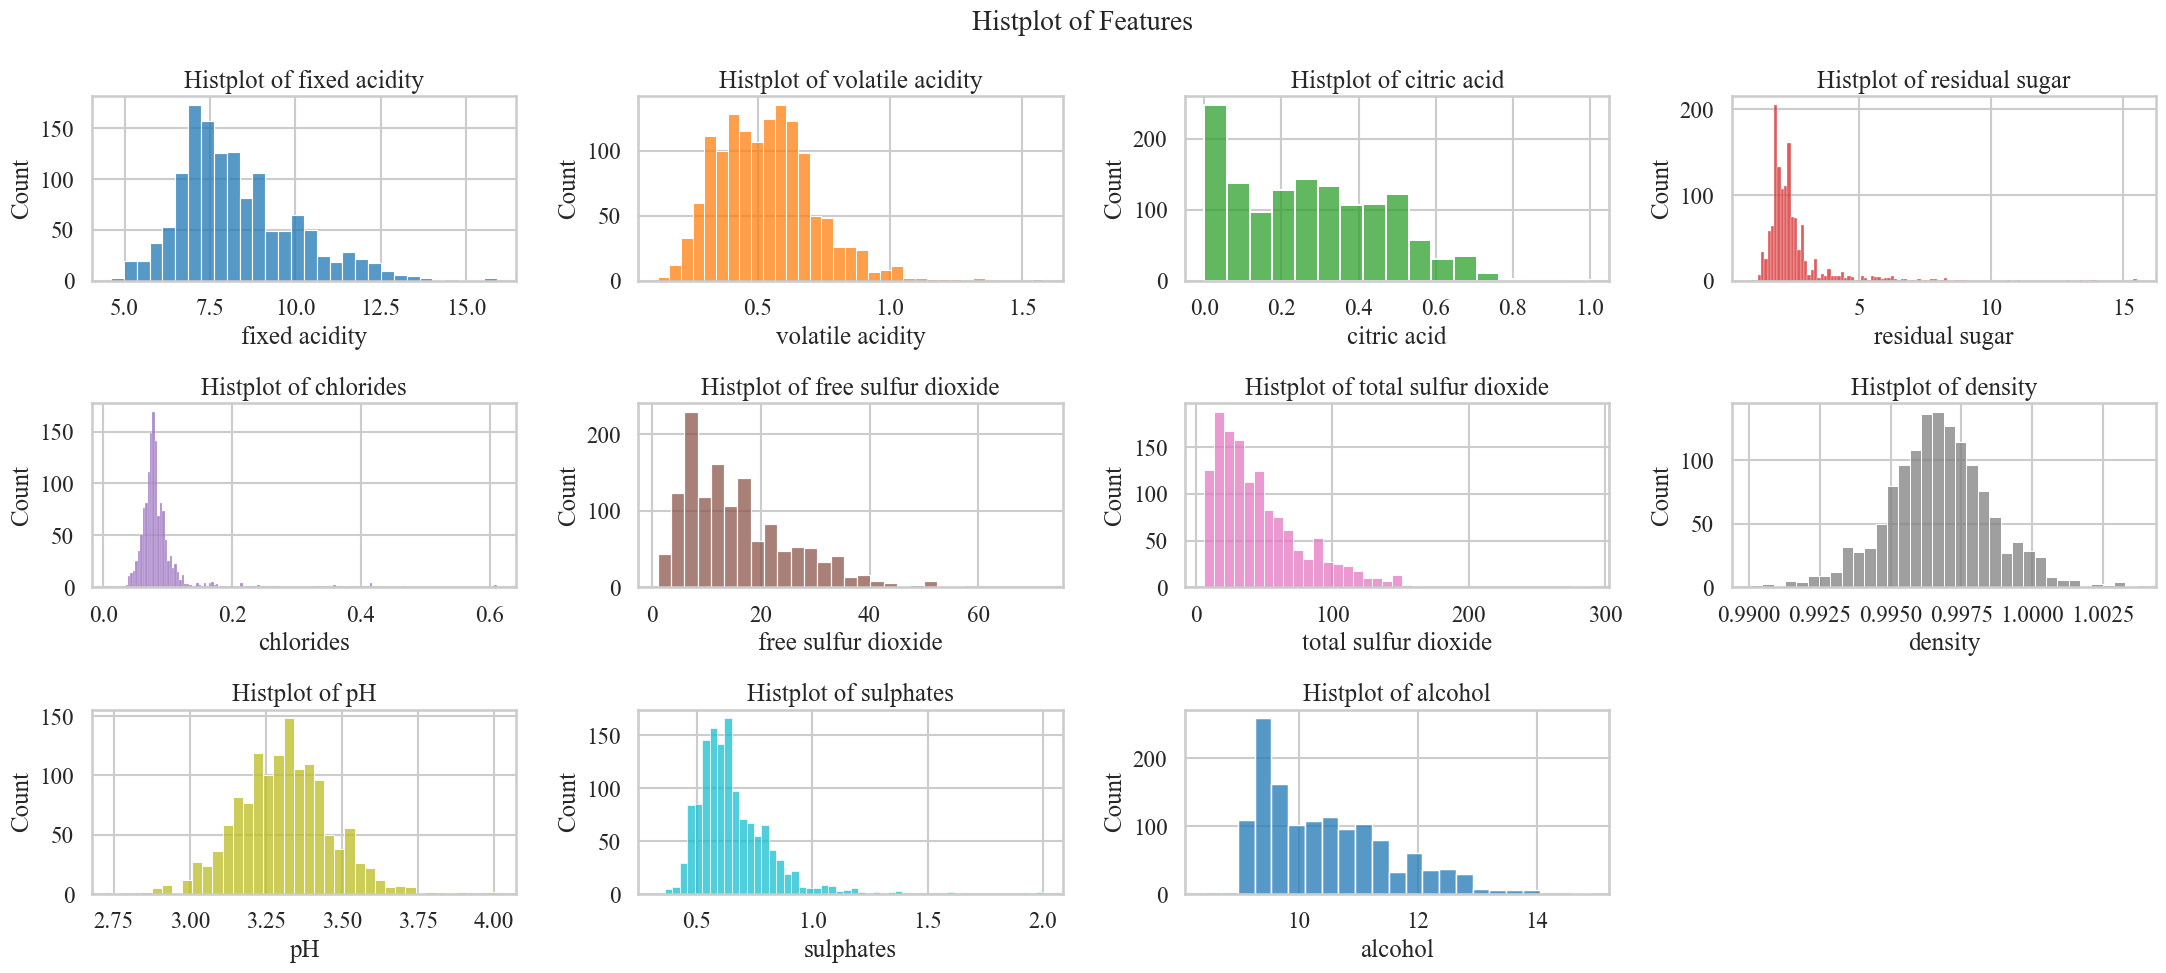

In [1821]:
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(22, 10))
colors = sns.color_palette("tab10", len(variables.columns))

for ind, column in enumerate(variables):
    row = ind // cols
    col = ind % cols
    sns.histplot(variables, x=column, ax=axes[row, col], color=colors[ind])
    axes[row, col].set_title(f"Histplot of {column}")

for i in range(ind + 1, rows * cols):
    fig.delaxes(axes.flatten()[i])


fig.suptitle("Histplot of Features", fontsize=20)
fig.tight_layout()
plt.show()

Since outliers can have a significant impact on an Ordinary Least Squares (OLS) regression model, potentially leading to unreliable results, we'll use the IQR to remove the extreme values.

In [1822]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Column: {col}")
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print(f"Number of outliers removed: {df.shape[0] - df_cleaned.shape[0]}")
    return df_cleaned


variables_cleaned = wine.copy()

for column in variables_cleaned.columns:
    if column != "quality":
        variables_cleaned = remove_outliers(variables_cleaned, column)

Column: fixed acidity
Number of outliers removed: 41
Column: volatile acidity
Number of outliers removed: 19
Column: citric acid
Number of outliers removed: 1
Column: residual sugar
Number of outliers removed: 112
Column: chlorides
Number of outliers removed: 73
Column: free sulfur dioxide
Number of outliers removed: 23
Column: total sulfur dioxide
Number of outliers removed: 44
Column: density
Number of outliers removed: 20
Column: pH
Number of outliers removed: 16
Column: sulphates
Number of outliers removed: 23
Column: alcohol
Number of outliers removed: 2


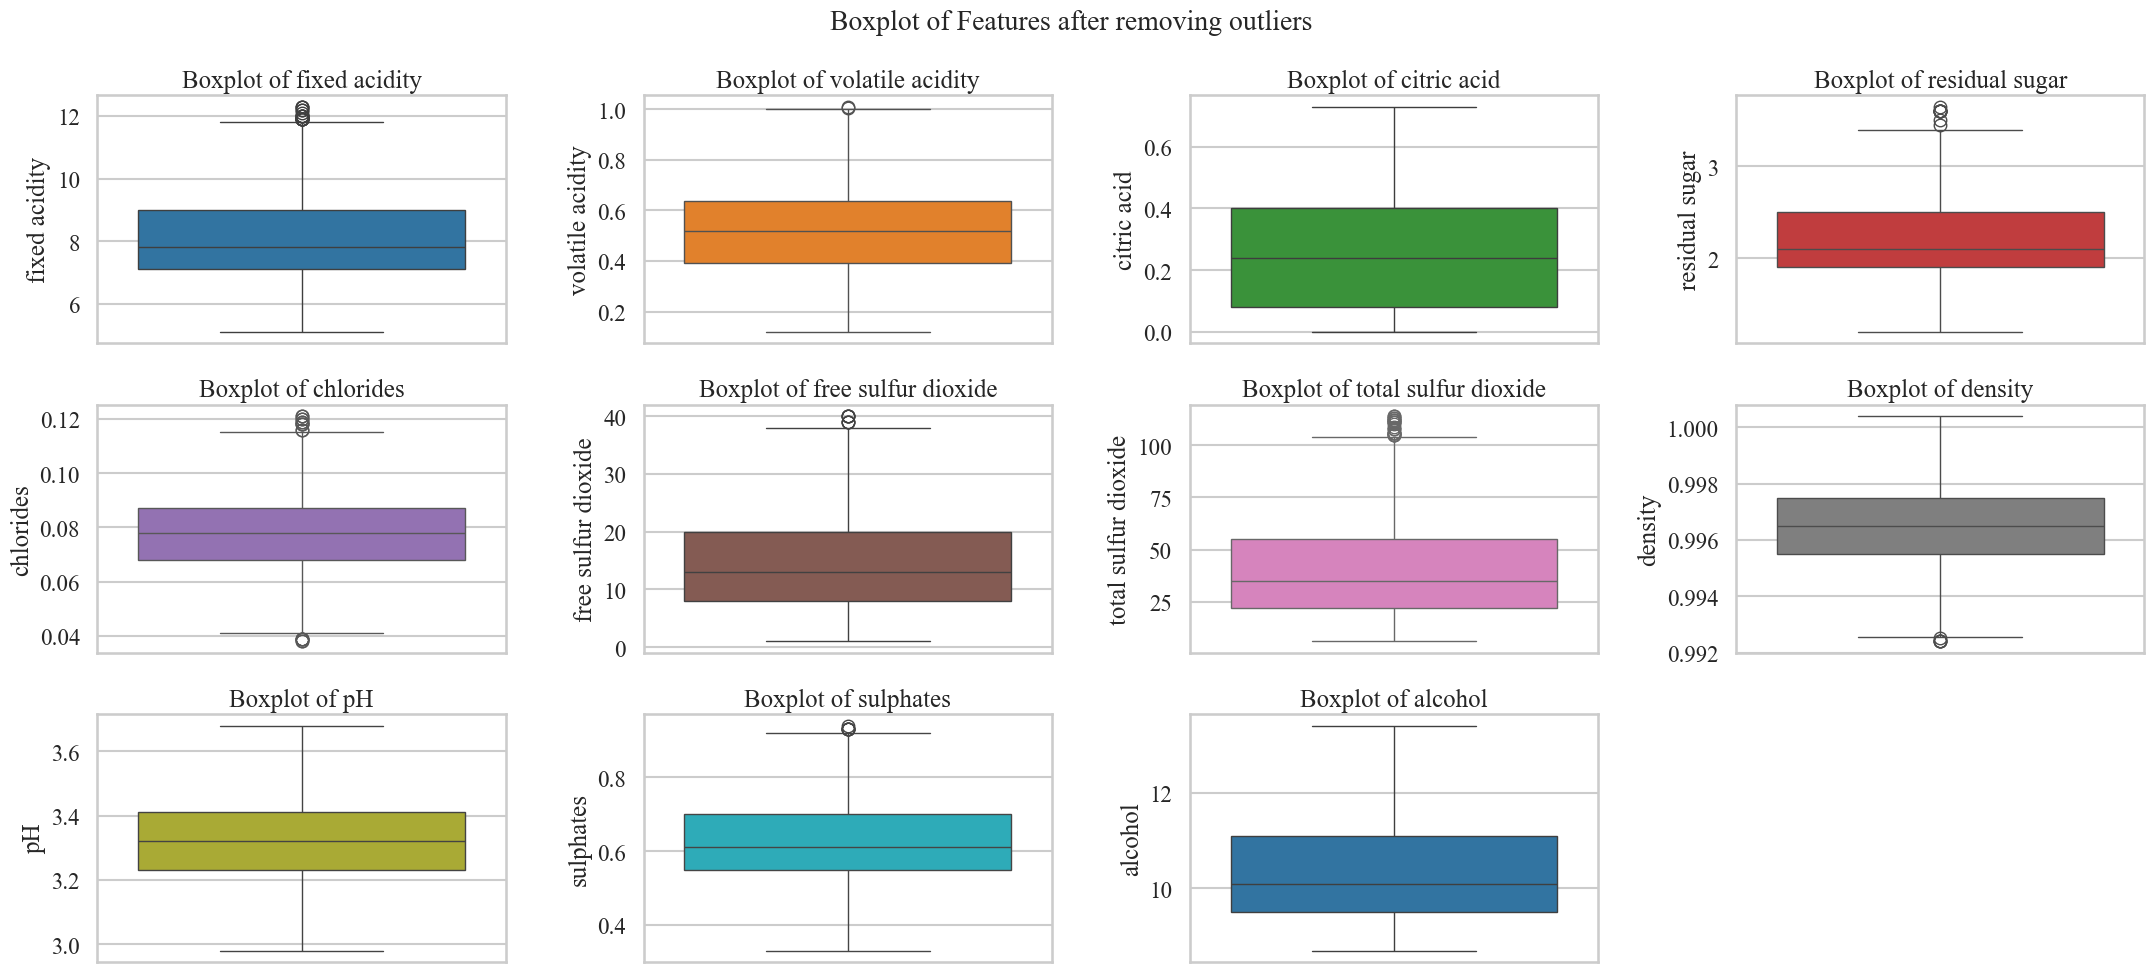

In [1823]:
variables_cleaned_no_quality = variables_cleaned.drop("quality", axis=1)
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(22, 10))
colors = sns.color_palette("tab10", len(variables_cleaned_no_quality.columns))

for ind, column in enumerate(variables_cleaned_no_quality):
    row = ind // cols
    col = ind % cols
    sns.boxplot(
        variables_cleaned_no_quality[column],
        orient="v",
        ax=axes[row, col],
        color=colors[ind],
    )
    axes[row, col].set_title(f"Boxplot of {column}")

for i in range(ind + 1, rows * cols):
    fig.delaxes(axes.flatten()[i])

fig.suptitle("Boxplot of Features after removing outliers", fontsize=20)
fig.tight_layout()
plt.show()

#### Correlation Matrix

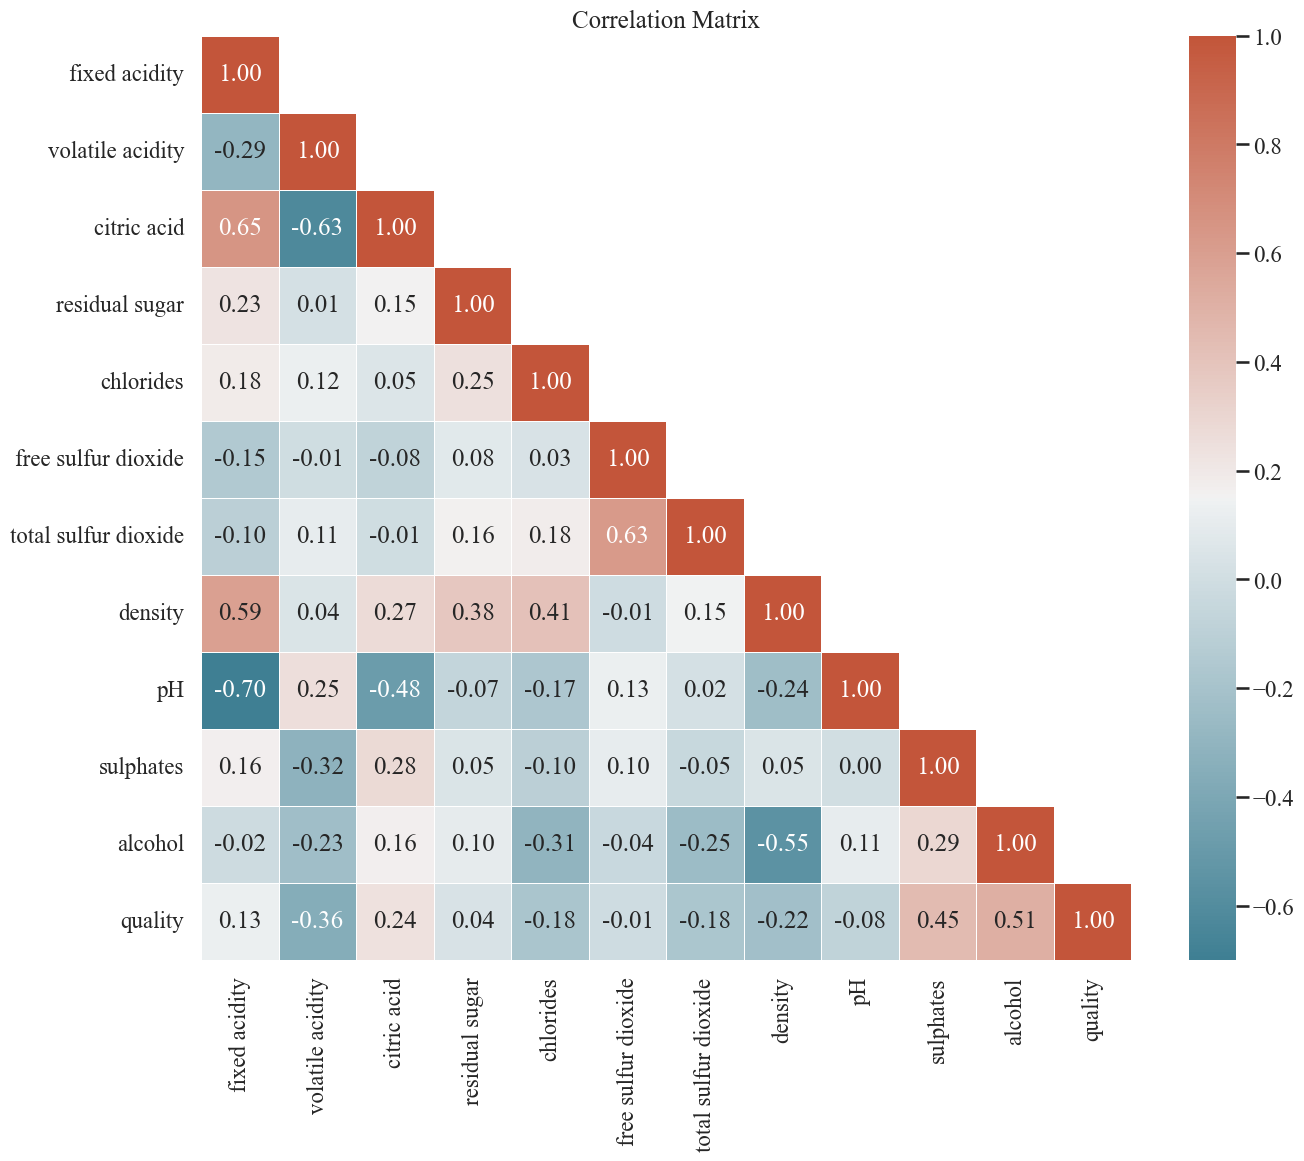

In [1824]:
mask = np.triu(np.ones_like(variables_cleaned.corr(), dtype=bool), k=1)

plt.figure(figsize=(15, 12))
plt.title("Correlation Matrix")
sns.heatmap(
    variables_cleaned.corr(),
    mask=mask,
    annot=True,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    fmt=".2f",
    linewidths=0.5,
)
plt.grid(False)
plt.show()

**Meaningful Correlations**

The following meaningful correlations were observed (absolute correlation coefficients greater than 0.5):

1.  **Fixed acidity & citric acid** (0.65)
2.  **Fixed acidity & density** (0.59)
3.  **Fixed acidity & pH** (-0.70)
4.  **Density & alcohol** (-0.55)
5.  **Volatile acidity & citric acid** (-0.63)
6.  **Free sulfur dioxide & total sulfur dioxide** (0.63)

- Among the various factors examined, the strongest correlation observed was between fixed acidity and pH, with a value of -0.70. This was followed by a correlation of 0.65 between fixed acidity and citric acid and a correlation of -0.63 between volatile acidity and citric acid.

- It’s important to note that pH measures how acidic or basic a solution is, and it is inversely related to acidity. As fixed acidity increases, the pH decreases, indicating that the wine becomes more acidic; this inverse relationship explains the negative correlation.

- Additionally, alcohol is less dense than water and most other components found in wine. Therefore, as the alcohol content increases, the overall density of the wine tends to decline, which leads to the expected negative correlation with density.

- Volatile acidity, primarily composed of acetic acid, is generally viewed as an undesirable characteristic in wine. In contrast, citric acid adds a sense of freshness and tartness. It is possible that winemakers adjust citric acid levels to balance out high volatile acidity, resulting in a negative correlation between these two factors.

- Lastly, total sulfur dioxide represents the combined amount of free and bound sulfur dioxide in the wine. Since free sulfur dioxide is the active form that helps protect the wine, an increase in total sulfur dioxide typically leads to a rise in free sulfur dioxide levels as well.


### Boxplot of each feature by quality

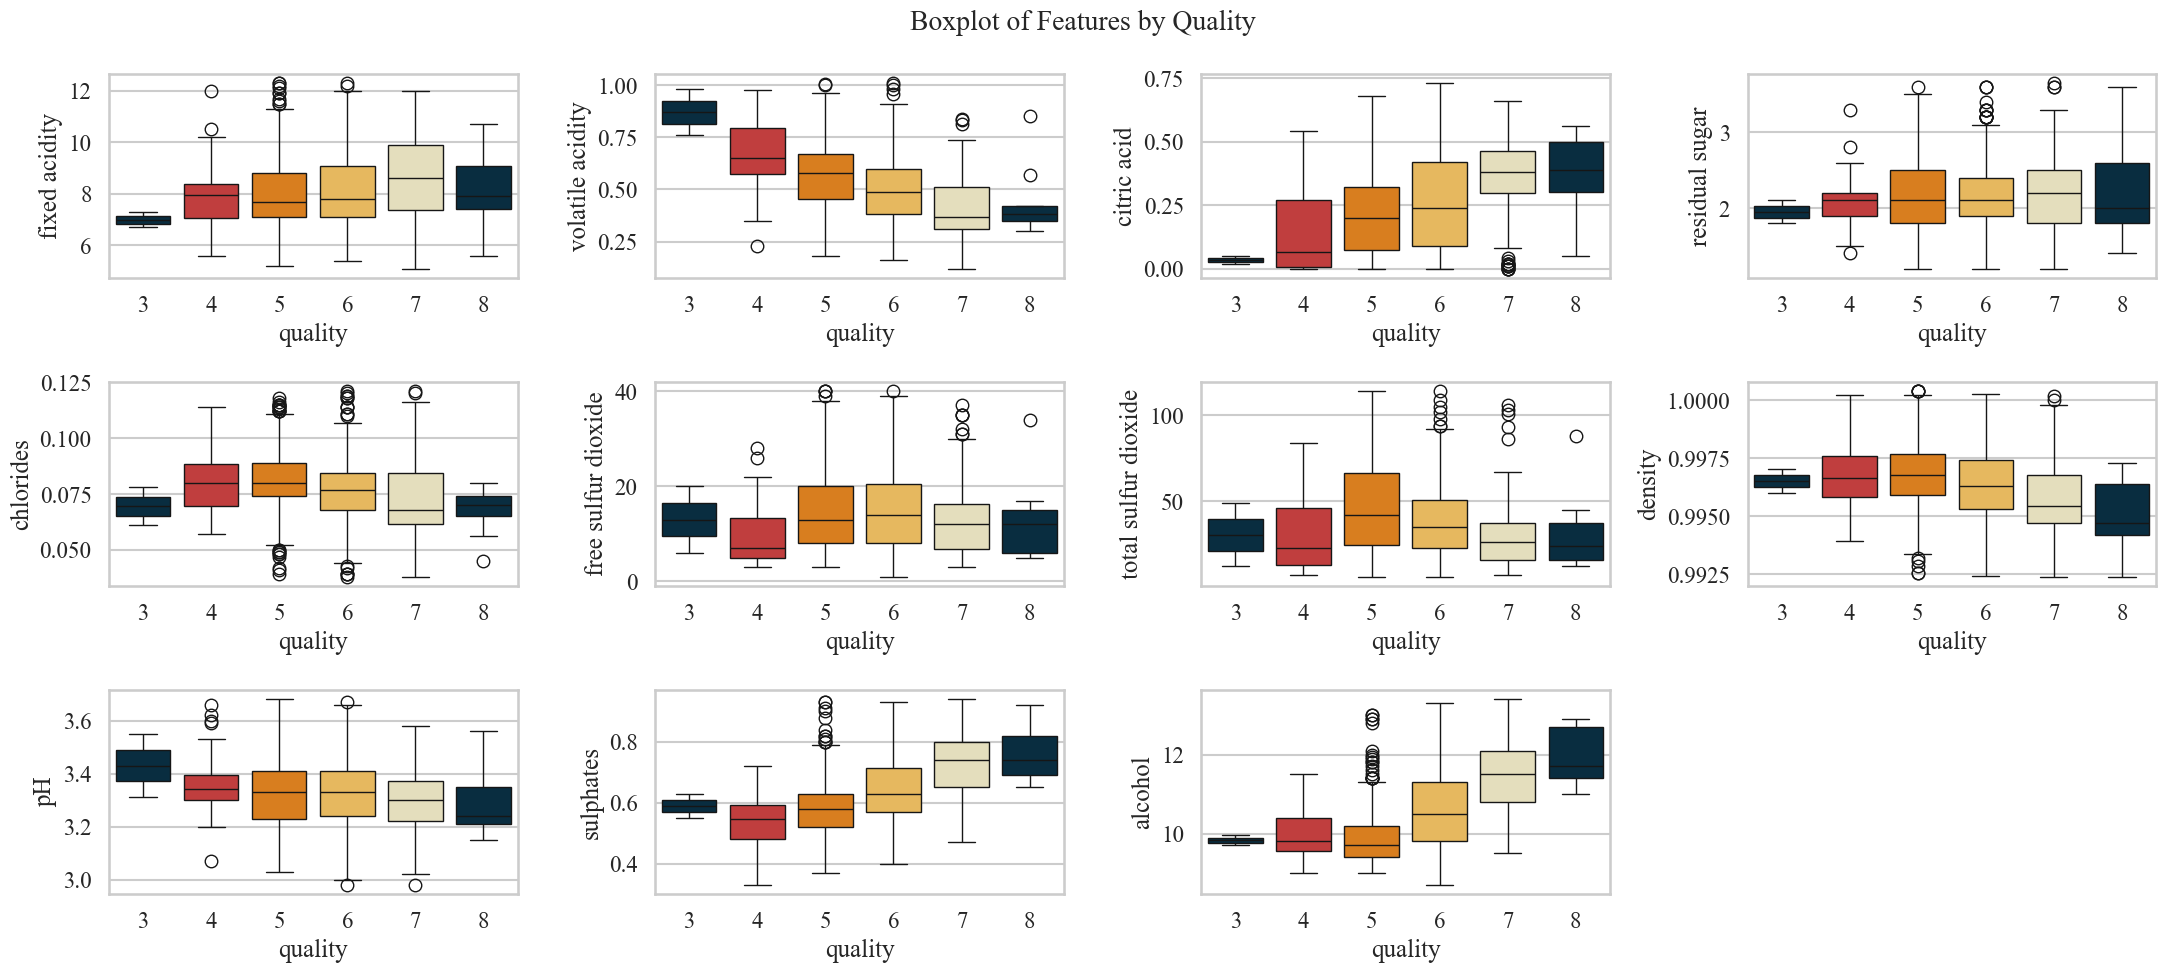

In [1825]:
fig, axes = plt.subplots(3, 4, figsize=(22, 10))
palette = ["#003049", "#d62828", "#f77f00", "#fcbf49", "#eae2b7"]

for ind, var in enumerate(variables_cleaned_no_quality.columns):
    sns.boxplot(
        x=variables_cleaned["quality"],
        y=variables_cleaned[var],
        ax=axes[ind // 4, ind % 4],
        palette=palette,
    )

for i in range(ind + 1, 3 * 4):
    fig.delaxes(axes.flatten()[i])

fig.suptitle("Boxplot of Features by Quality", fontsize=20)
plt.tight_layout()
plt.show()

**Features that change according to the quality:**

- **Volatile Acidity**: This measures the presence of low molecular weight (or steam-distillable) fatty acids in wine and is often associated \
with the smell of vinegar. Lower levels of volatile acidity enhance the wine's overall flavors.
 
- **Citric Acid**: This component contributes to the wine's tartness and freshness. Winemakers sometimes add small amounts \
of citric acid to boost acidity, particularly in warmer climates where grapes may lack natural acidity.
 
- **Sulphates**: Sulphates help prevent oxidation and microbial spoilage, thereby preserving the wine's freshness and extending its shelf \
life. While they do not contribute directly to positive flavors, sulphates play a crucial role in maintaining the wine's quality over time.
 
- **Alcohol**: Alcohol contributes to the wine's "body" or "weight," creating a sensation of fullness in the mouth. Wines with higher alcohol \
content usually feel richer and more viscous, which can be a desirable trait, especially in full-bodied wines.



### Single Variable Analysis

Check if the variables are normally distributed

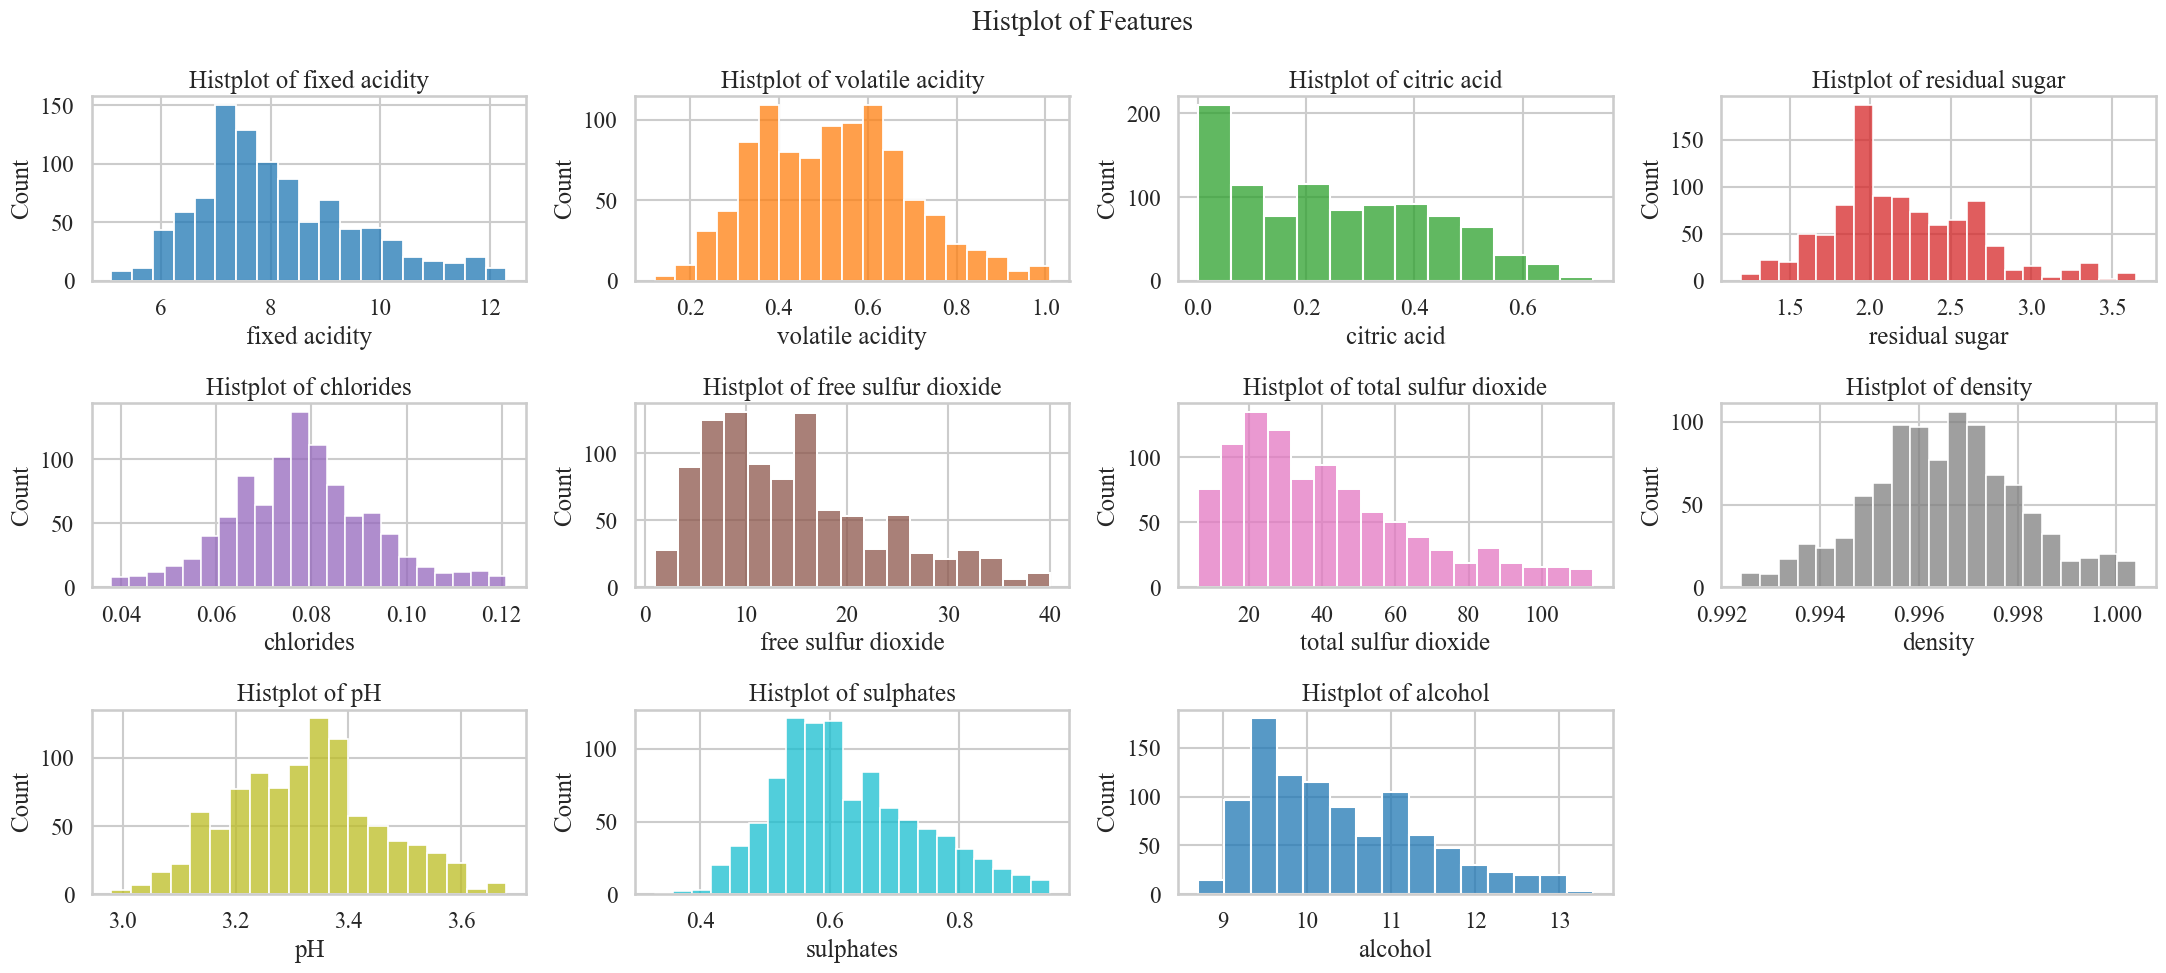

In [1826]:
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(22, 10))
colors = sns.color_palette("tab10", len(variables_cleaned_no_quality.columns))

for ind, column in enumerate(variables_cleaned_no_quality):
    row = ind // cols
    col = ind % cols
    sns.histplot(
        variables_cleaned_no_quality,
        x=column,
        ax=axes[row, col],
        color=colors[ind],
    )
    axes[row, col].set_title(f"Histplot of {column}")

for i in range(ind + 1, rows * cols):
    fig.delaxes(axes.flatten()[i])

fig.suptitle("Histplot of Features", fontsize=20)
fig.tight_layout()
plt.show()

Most variables are normally distributed. The remaining skewed data will be transformed to a log scale to achieve a normally distributed dataset and prevent any biased estimations and incorrect inferences.

In [1827]:
variables_transformed = variables_cleaned.copy()

for column in variables_cleaned_no_quality.columns:
    skewness = skew(variables_cleaned_no_quality[column])
    print(f"Skewness of {column}: {skewness:.2f}")

    if skewness > 0.5:
        variables_transformed[column] = np.log1p(
            variables_cleaned_no_quality[column]
        )
        print(f"Applied log transformation to {column}")
    elif skewness < -0.5:
        variables_transformed[column] = (
            variables_cleaned_no_quality[column] ** 2
        )
        print(f"Applied squared transformation to {column}")

Skewness of fixed acidity: 0.72
Applied log transformation to fixed acidity
Skewness of volatile acidity: 0.32
Skewness of citric acid: 0.31
Skewness of residual sugar: 0.63
Applied log transformation to residual sugar
Skewness of chlorides: 0.18
Skewness of free sulfur dioxide: 0.81
Applied log transformation to free sulfur dioxide
Skewness of total sulfur dioxide: 0.92
Applied log transformation to total sulfur dioxide
Skewness of density: 0.04
Skewness of pH: 0.13
Skewness of sulphates: 0.53
Applied log transformation to sulphates
Skewness of alcohol: 0.74
Applied log transformation to alcohol


Since the dataset contains different units (e.g., acidity in grams per liter, alcohol in percentage), we will standardize it to ensure \
that all variables contribute equally to the analysis, preventing those with larger scales from dominating.

In [1828]:
scaler = StandardScaler()
dep_scaled = scaler.fit_transform(
    variables_transformed.drop("quality", axis=1)
)
dep_scaled = pd.DataFrame(
    dep_scaled, columns=variables_transformed.columns[:-1]
)

dep_scaled.reset_index(drop=True, inplace=True)
dep_scaled["quality"] = variables_transformed["quality"].reset_index(drop=True)

​To identify multicollinearity, we will use the variance inflation factor (VIF).

In [1829]:
vif_data = pd.DataFrame()
vif_data["feature"] = dep_scaled.columns
vif_data["VIF"] = [
    variance_inflation_factor(dep_scaled.values, i)
    for i in range(dep_scaled.shape[1])
]

vif_data

feature       VIF
0          fixed acidity  6.938250
1       volatile acidity  1.951940
2            citric acid  2.926424
3         residual sugar  1.667450
4              chlorides  1.307332
5    free sulfur dioxide  2.787238
6   total sulfur dioxide  3.079863
7                density  6.423556
8                     pH  3.215117
9              sulphates  1.346055
10               alcohol  3.612787
11               quality  1.007379

`fixed acidity` (VIF = 6.94) and `density` (VIF = 6.42) suggest high multicollinearity, meaning they are highly correlated with other variables.
Other variables have acceptable VIF values (< 5).

The density variable could contributing to multicollinearity. Indeed, it measures the amount of mass in a specific volume, and in wine, it is significantly affected by components such as alcohol, sugar, and acids. Higher alcohol content reduces density since alcohol is less dense than water. Conversely, increased levels of fixed acidity and sugar raise density because they contribute additional dissolved solids.

In [1830]:
dep_scaled.head()
test = dep_scaled.drop(["density"], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = test.columns
vif_data["VIF"] = [
    variance_inflation_factor(test.values, i) for i in range(len(test.columns))
]
vif_data

feature       VIF
0          fixed acidity  3.119998
1       volatile acidity  1.926920
2            citric acid  2.921305
3         residual sugar  1.251045
4              chlorides  1.257424
5    free sulfur dioxide  2.775968
6   total sulfur dioxide  3.065534
7                     pH  2.187553
8              sulphates  1.260279
9                alcohol  1.452508
10               quality  1.007366

After removing `density`, `fixed acidity`’s VIF dropped from 6.94 → 3.12, while `alcohol`'s VIF also dropped from 3.61 → 1.45 confirming that density was inflating the collinearity.


In [1831]:
dep_scaled.drop(["density"], axis=1, inplace=True)

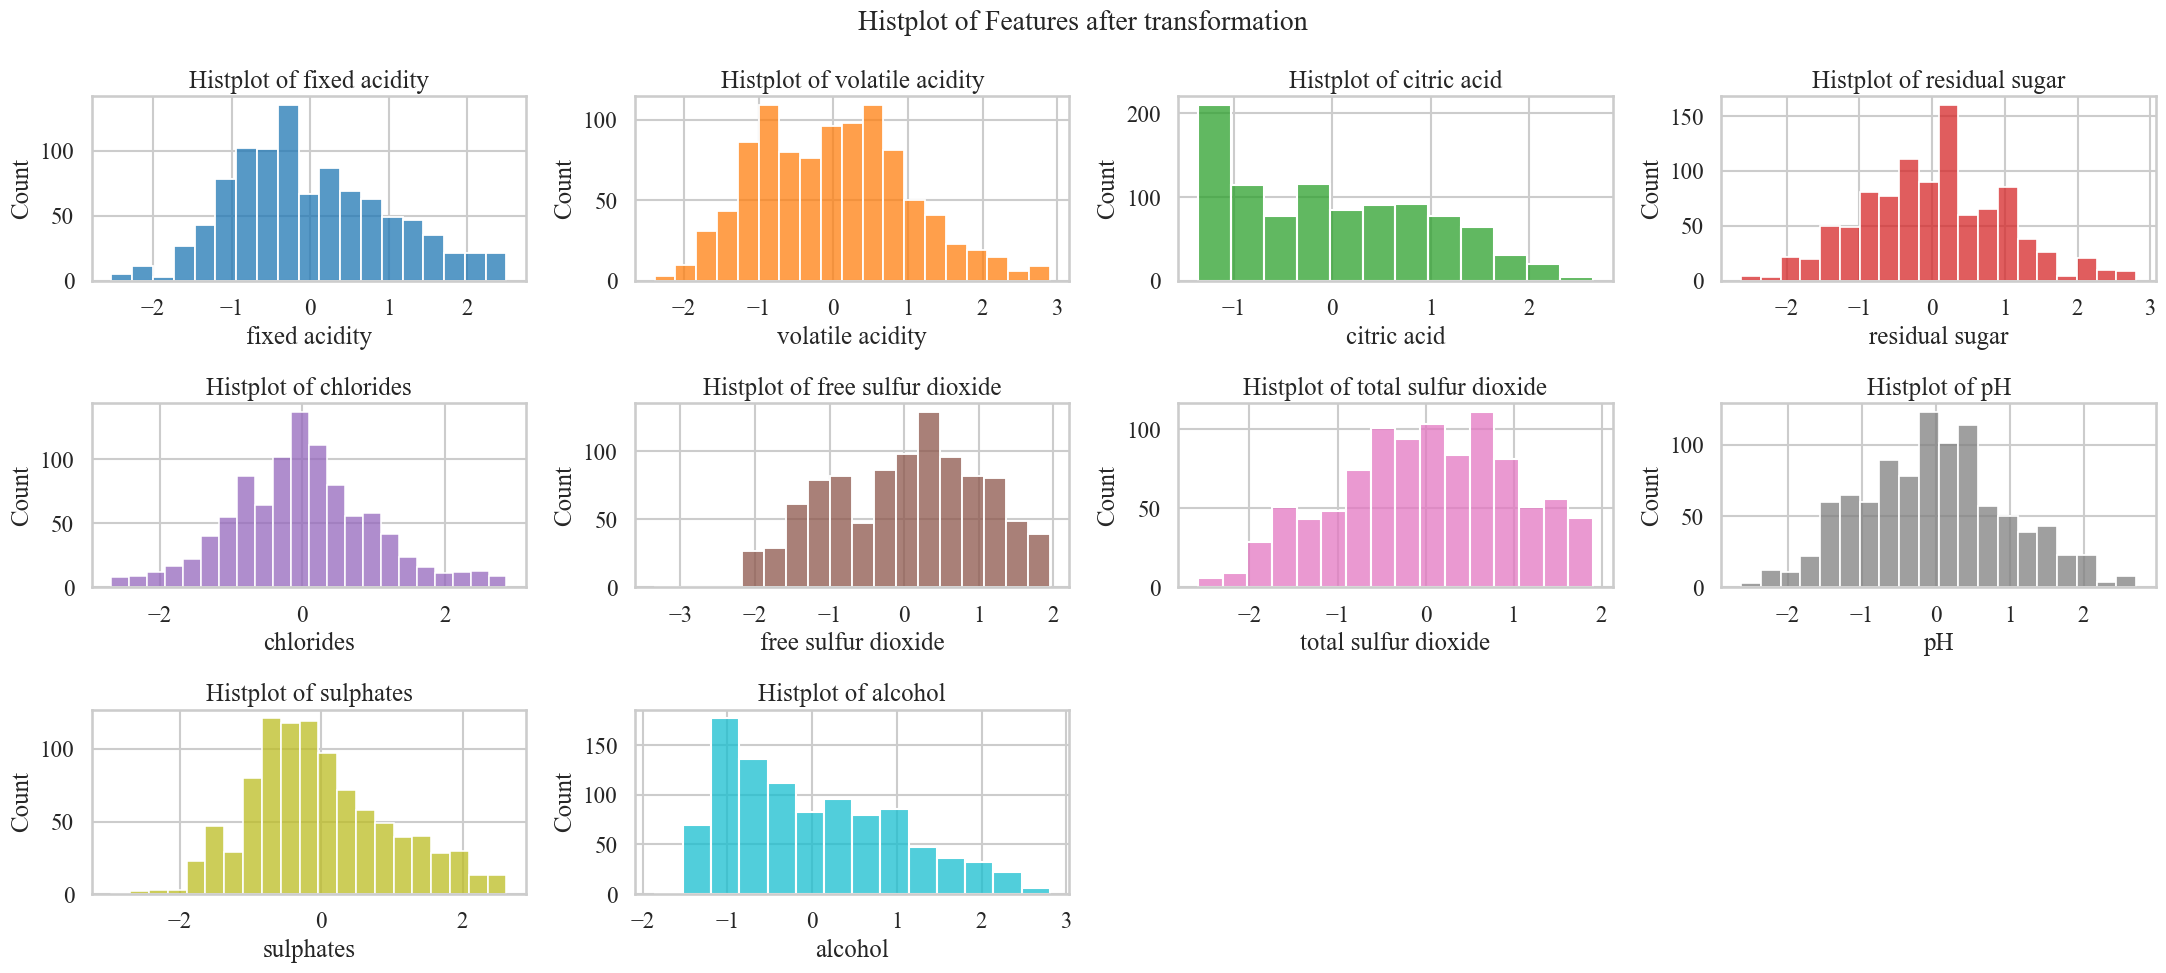

In [1832]:
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(22, 10))
colors = sns.color_palette("tab10", len(dep_scaled.columns) - 1)

for ind, column in enumerate(dep_scaled.drop("quality", axis=1)):
    row = ind // cols
    col = ind % cols
    sns.histplot(dep_scaled, x=column, ax=axes[row, col], color=colors[ind])
    axes[row, col].set_title(f"Histplot of {column}")

for i in range(ind + 1, rows * cols):
    fig.delaxes(axes.flatten()[i])

fig.suptitle("Histplot of Features after transformation", fontsize=20)
fig.tight_layout()
plt.show()

### Pair Plot of the dataset

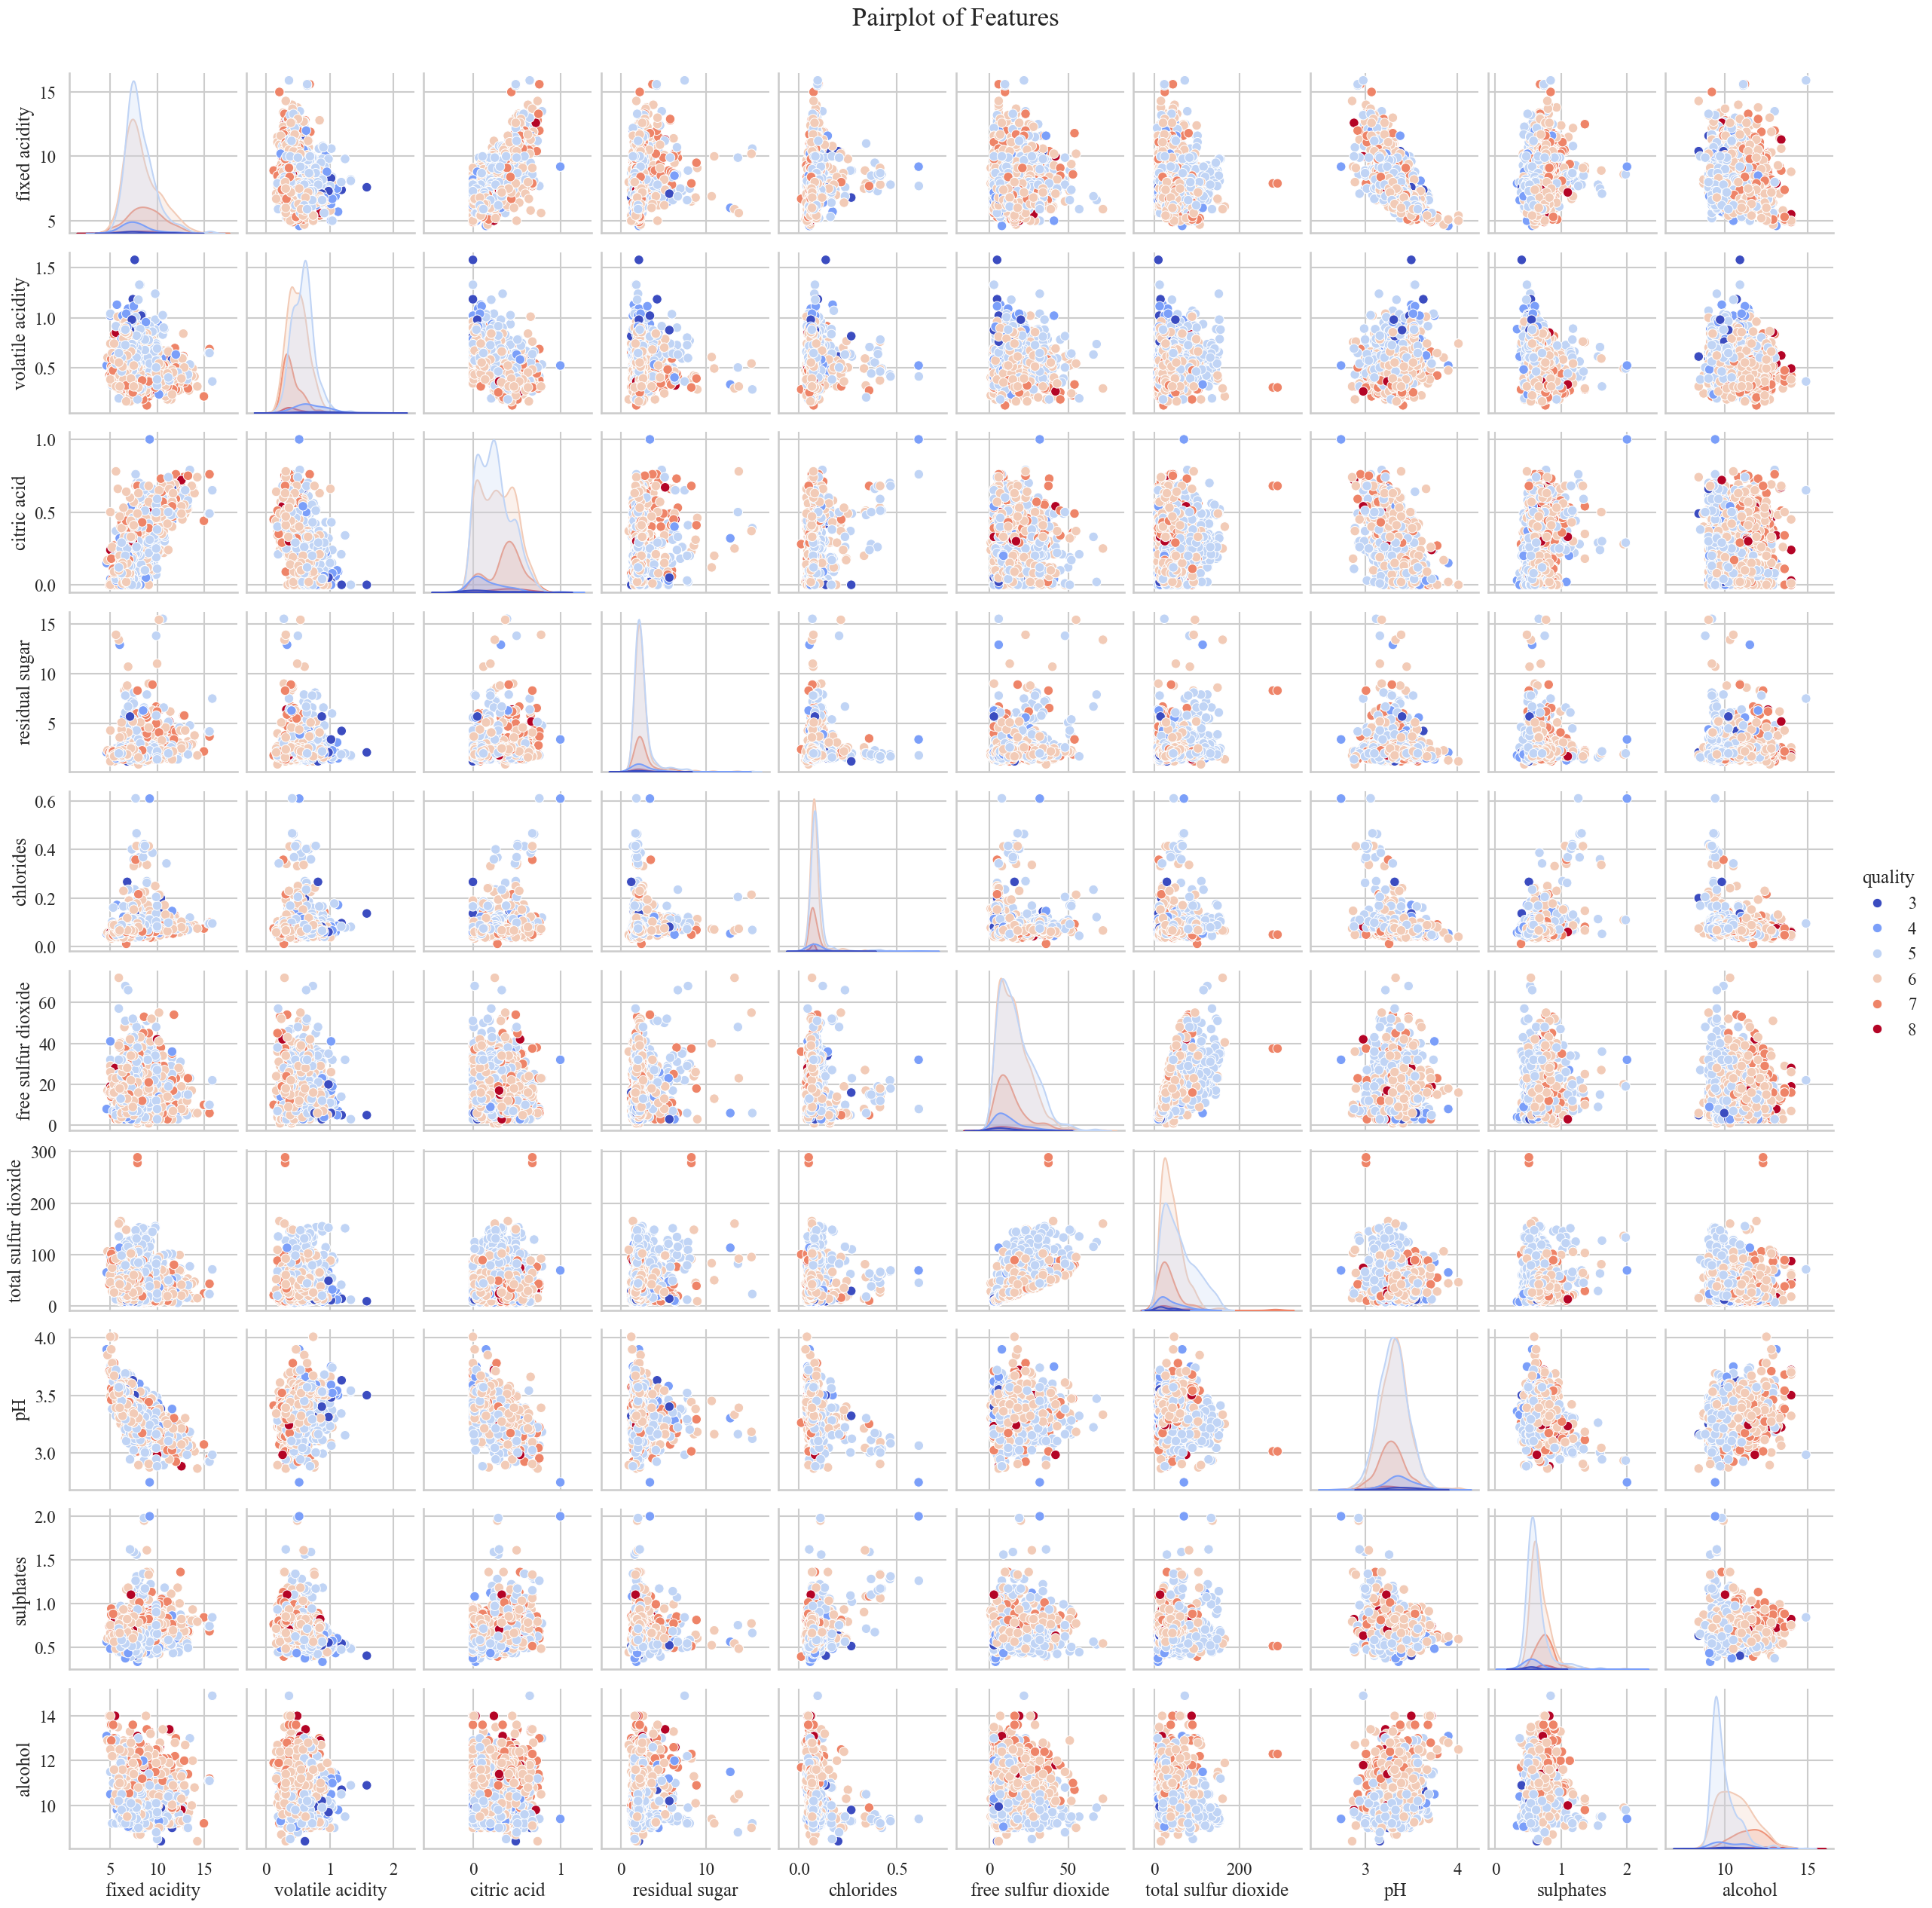

In [1833]:
mask = np.triu(np.ones_like(dep_scaled, dtype=bool))
sns.pairplot(
    wine.drop(["density"], axis=1),
    hue="quality",
    palette="coolwarm",
    diag_kind="kde",
)
plt.suptitle("Pairplot of Features", fontsize=25, y=1.02)
plt.show()

### Explanatory Model

**Variables Potentially Related to both Alcohol and Quality**: We will include variables that could plausibly influence both alcohol content and wine quality.

**Variables Considered for Ordinary Least Squares (OLS)**:

- **Fixed Acidity, Volatile Acidity, Citric Acid**: These factors are related to the overall acidity of the wine, which can impact both the fermentation process (and thereby alcohol content) as well as the perceived quality of the wine.
- **Residual Sugar**: The sugar content can affect the final alcohol content, as it is fermented into alcohol. Additionally, it influences the perceived sweetness and quality of the wine.
- **Sulphates**: Sulphates are often added to wine as preservatives and can affect both the taste and the fermentation process.

**Variables Less Directly Related**:

- **Chlorides**: Chlorides (salt content) may have a minor effect on taste but are less likely to be strongly related to both alcohol and quality in a way that would significantly confound the analysis. They are not as critical as the other factors.
- **Free Sulfur Dioxide, Total Sulfur Dioxide**: These are related to preservation and can influence taste; however, they are unlikely to have a strong connection to alcohol content itself. They may affect quality independently of alcohol, but they are not as essential as the acidity and sugar-related variables.
- **pH**: Since pH is related to acidity and we are including acidity measures, pH may be redundant in this context.

#### Ordinary least squares

Before introducing interaction terms or modifying the dependent variable, we begin by estimating a baseline Ordinary Least Squares (OLS) regression model.

In [1834]:
# Define feature variables (X) and target variable (y)
X = dep_scaled[
    [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "sulphates",
        "alcohol",
    ]
]

y = dep_scaled["quality"]

# Add constant for intercept in regression model
X = sm.add_constant(X)

# Split data into training (80%) and hold-out (20%)
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Reset indices to align endogenous (y) and exogenous (X)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Fit the OLS regression model
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

# Predict on training and holdout sets
y_train_pred = model.predict(X_train)
y_holdout_pred = model.predict(X_holdout)

# Compute R² and MSE for training and holdout sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_holdout = mean_squared_error(y_holdout, y_holdout_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_holdout = r2_score(y_holdout, y_holdout_pred)

print(f"Training MSE: {mse_train:.3f}")
print(f"Holdout MSE: {mse_holdout:.3f}")
print(f"Training R²: {r2_train:.3f}")
print(f"Holdout R²: {r2_holdout:.3f}")

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     86.50
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           4.78e-83
Time:                        14:20:24   Log-Likelihood:                -710.82
No. Observations:                 788   AIC:                             1436.
Df Residuals:                     781   BIC:                             1468.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6537      0.021  

- The initial R² value (0.399) indicates that approximately 40% of the variance in wine quality is \
explained by the selected features.

- `Fixed acidity`, `volatile acidity`, `sulphates`, and `alcohol` significantly influence wine quality. Particularly, `alcohol` has the largest positive effect, while `volatile acidity` has a significant negative effect.

- However, the coefficient of the `residual sugar`, 
has high p-values (>0.05) and the 95% confidence interval includes zero suggesting it may not be statistically significant predictor.


Additionally, comparing the training and holdout R² values (0.399 and 0.353, respectively) suggests the model generalizes \
reasonably well, though the mean squared error (MSE) values indicate room for improvement.



### Addition of Interaction Term

The results indicate that alcohol and sulphates are the strongest predictors of wine quality, as they have \
the highest absolute coefficients and the lowest p-values. 

Given the moderate R² value, one potential improvement is to introduce interaction terms, \
which can help capture nonlinear relationships between features. A logical interaction to explore is \
`alcohol` × `sulphates`, as both variables have a strong impact on quality and their combined effect may \
be greater than the sum of their individual impacts.

#### Ordinary Least Squares

In [1835]:
# Create interaction term between alcohol and sulphates
dep_scaled["alcohol_sulphates"] = (
    dep_scaled["alcohol"] * dep_scaled["sulphates"]
)

X = dep_scaled[
    [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "sulphates",
        "alcohol",
        "alcohol_sulphates",
    ]
]
y = dep_scaled["quality"]

# Add constant for intercept
X = sm.add_constant(X)

# Split data into training (80%) and hold-out (20%)
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Reset indices to align endogenous (y) and exogenous (X)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Fit the model
model_interaction = sm.OLS(y_train, X_train).fit()

print(model_interaction.summary())

# Predict on training and holdout sets
y_train_pred = model_interaction.predict(X_train)
y_holdout_pred = model_interaction.predict(X_holdout)

# Compute R² and MSE for training and holdout sets
r2_train = r2_score(y_train, y_train_pred)
r2_holdout = r2_score(y_holdout, y_holdout_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_holdout = mean_squared_error(y_holdout, y_holdout_pred)

print(f"Training MSE: {mse_train:.3f}")
print(f"Holdout MSE: {mse_holdout:.3f}")
print(f"Training R²: {r2_train:.3f}")
print(f"Holdout R²: {r2_holdout:.3f}")

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     87.18
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.41e-83
Time:                        14:20:24   Log-Likelihood:                -709.59
No. Observations:                 788   AIC:                             1433.
Df Residuals:                     781   BIC:                             1466.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.6408      0.02

- The training **R² value increased** from 0.399 to 0.401, indicating a small but meaningful enhancement in its explanatory power. Additionally,
the holdout R² rose from 0.353 to 0.371, suggesting that the model generalizes better to unseen data. 

- Furthermore, the **mean squared error (MSE)** values have also shown **slight improvement**, reinforcing the decision to include the interaction term. 

- Apparently, the introduction of the **interaction term** (`alcohol_sulphates`) doesn't improve the model's performance and the 95% confidence interval includes zero suggesting it may not be statistically significant predictor.

- `Fixed acidity`, `volatile acidity`, `sulphates`, and `alcohol` are statistically significant because their confidence intervals do not include zero. 

- Among these, `alcohol` has the largest positive effect on wine quality, followed by `sulphates` and `fixed acidity`. `Volatile acidity` has a significant negative effect.

In both models, the R² values indicate that they perform slightly better on the training set than on the holdout set. Although the difference is not significant enough to suggest overfitting, we will employ a different technique to further mitigate the risk of overfitting. 

#### ElasticNet regression

To further refine the model, we applied ElasticNet regression, which balances L1 (Lasso) and L2 (Ridge) regularization. The main goals of using ElasticNet were:

- Reducing model complexity by shrinking less important coefficients toward zero.
- Improving generalization by preventing overfitting.

In [1836]:
# Define feature variables (X) and target variable (y)
X = dep_scaled.drop("quality", axis=1)
y = dep_scaled["quality"]


# Split data into training (80%) and hold-out (20%)
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Elastic Net Regression with Cross-Validation
elastic_net_cv = ElasticNetCV(cv=10, random_state=42)
elastic_net_cv.fit(X_train, y_train)

# Predict the hold-out and training sets
y_pred_elastic_net = elastic_net_cv.predict(X_holdout)
x_pred_elastic_net = elastic_net_cv.predict(X_train)

# Calculate the Mean Squared Error (MSE) and R² for both training and hold-out sets
mse_elastic_net = mean_squared_error(y_holdout, y_pred_elastic_net)
elastic_net_r2 = r2_score(y_holdout, y_pred_elastic_net)
mse_train_elastic_net = mean_squared_error(y_train, x_pred_elastic_net)
elastic_net_r2_train = r2_score(y_train, x_pred_elastic_net)

elastic_net_coeffs = pd.DataFrame(
    {"Features": X.columns, "Elastic Net Coeff": elastic_net_cv.coef_}
)

print(elastic_net_coeffs)
print(f"Training MSE: {mse_train_elastic_net:.3f}")
print(f"Holdout MSE: {mse_elastic_net:.3f}")
print(f"Training R²: {elastic_net_r2_train:.3f}")
print(f"Holdout R²: {elastic_net_r2:.3f}")

                Features  Elastic Net Coeff
0          fixed acidity           0.008049
1       volatile acidity          -0.123141
2            citric acid          -0.042035
3         residual sugar          -0.000000
4              chlorides          -0.022416
5    free sulfur dioxide          -0.000000
6   total sulfur dioxide          -0.031754
7                     pH          -0.073298
8              sulphates           0.210885
9                alcohol           0.301879
10     alcohol_sulphates           0.031309
Training MSE: 0.351
Holdout MSE: 0.389
Training R²: 0.408
Holdout R²: 0.370


The **training R²** (0.408) and **holdout R²** (0.370) are very close to the OLS model, indicating that **regularization did not significantly harm explanatory power**.
MSE values (0.351 training, 0.389 holdout) are similar to OLS, meaning **the model is neither underfitting nor overfitting**.

Coefficient Shrinkage:

- `Residual sugar` and `free sulfur dioxide` were removed from the model, indicating it had little predictive power. 
- `citric acid`, `chlorides`, `total sulfur dioxide`, and `pH` contribute, but their have a small impact.
- Higher `volatile acidity` negatively impacts wine quality.
- `Alcohol` and `sulphates` remain dominant, confirming their strong influence on wine quality.
- The interaction term (alcohol × sulphates) coefficient remain almost the same.

These results suggest that while **ElasticNet does not drastically change model performance**, it helps reduce feature complexity by **shrinking weaker coefficients**. \
This confirms that a simpler model with fewer predictors could achieve similar predictive power.

### Imbalance Adjustment

The original wine quality scores range from 3 to 8, but the distribution is imbalanced. Specifically, wines rated 5 and 6 \
dominate the dataset, while very few samples are rated 3 or 8. This class imbalance can potentially distort model predictions, \
as the regression model may be biased toward the majority classes.

To address this issue, we merged quality scores 3 into 4 and 8 into 7, reducing the class imbalance while still \
preserving the ordinal nature of the variable.


#### ElasticNet Regression

In [1837]:
# Merge quality scores 3 and 4, and 8 and 7
compress = dep_scaled.copy()
compress["quality"] = (
    dep_scaled["quality"].reset_index(drop=True).replace({3: 4, 8: 7})
)

# Define feature variables (X) and target variable (y)
X = compress.drop("quality", axis=1)
y = compress["quality"]

# Split data into training (80%) and hold-out (20%)
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Elastic Net Regression with Cross-Validation
elastic_net_cv = ElasticNetCV(cv=10, random_state=42)
elastic_net_cv.fit(X_train, y_train)

# Predict the hold-out and training sets
y_pred_elastic_net = elastic_net_cv.predict(X_holdout)
x_pred_elastic_net = elastic_net_cv.predict(X_train)

# Calculate the Mean Squared Error (MSE) and R² for both training and hold-out sets
mse_elastic_net = mean_squared_error(y_holdout, y_pred_elastic_net)
elastic_net_r2 = r2_score(y_holdout, y_pred_elastic_net)
mse_train_elastic_net = mean_squared_error(y_train, x_pred_elastic_net)
elastic_net_r2_train = r2_score(y_train, x_pred_elastic_net)

elastic_net_coeffs = pd.DataFrame(
    {"Features": X.columns, "Elastic Net Coeff": elastic_net_cv.coef_}
)

print(elastic_net_coeffs)
print(f"Training MSE: {mse_train_elastic_net:.3f}")
print(f"Holdout MSE: {mse_elastic_net:.3f}")
print(f"Training R²: {elastic_net_r2_train:.3f}")
print(f"Holdout R²: {elastic_net_r2:.3f}")


                Features  Elastic Net Coeff
0          fixed acidity           0.000000
1       volatile acidity          -0.114041
2            citric acid          -0.017100
3         residual sugar          -0.000000
4              chlorides          -0.013338
5    free sulfur dioxide           0.000000
6   total sulfur dioxide          -0.019336
7                     pH          -0.065171
8              sulphates           0.206322
9                alcohol           0.277717
10     alcohol_sulphates           0.022194
Training MSE: 0.328
Holdout MSE: 0.357
Training R²: 0.407
Holdout R²: 0.360


Recomputing the ElasticNet regression with the adjusted quality labels resulted in a lower MSE (0.328 for training, 0.357 for holdout), while the R² values remain very close to those of the model without merged quality scores.

Key Observations:
- The `alcohol_sulphates` interaction term remains significant (0.042), reinforcing the importance of their combined effect.

- Merging the quality scores does not significantly impact model performance—the R² slightly decreases, but the mean squared error (MSE) is reduced, suggesting a better overall fit.

### Conclusion & Summary 

1. **Baseline Model (OLS)**: The initial regression model provided an R<sup>2</sup> of 0.35, highlighting alcohol and sulphates as the strongest predictors of wine quality.

2. **Interaction Term Addition**: Adding alcohol × sulphates and using the regularization method lightly improved performance (R<sup>2</sup> of holding increased to 0.37), indicating that these two variables interact meaningfully.

5. **ElasticNet Regression**: Regularization did not significantly impact performance (R<sup>2</sup> = 0.41, Holdout R<sup>2</sup> = 0.37) but removed weaker predictors (`residual sugar`, `free sulfur dioxide`), making the model more interpretable and robust.
4. **Class Imbalance Adjustment**: Adjusting the dependent variable for disproportionate class distribution led to an MSE decrease to 0.36.


### Final Takeaway: 
The combination of OLS, interaction terms, and ElasticNet regularization suggests that `alcohol` and `sulphates` are the most reliable predictors of wine quality. While regularization simplifies the model, further improvements could involve nonlinear approaches (e.g., decision trees, neural networks) or feature engineering to capture more complex relationships.